<a href="https://colab.research.google.com/github/Mochi-Moch1/learn-huggingface/blob/main/tutorials/pipelines_for_inference_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pipeline usage

In [2]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.9 MB 29.1 MB/s 
     |████████████████████████████████| 120 kB 78.5 MB/s 
     |████████████████████████████████| 6.6 MB 57.6 MB/s 


In [3]:
from transformers import pipeline

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


Moving 0 files to the new cache system


0it [00:00, ?it/s]

In [4]:
generator = pipeline(task="text-generation")

No model was supplied, defaulted to gpt2 and revision 6c0e608 (https://huggingface.co/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/665 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/548M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [5]:
generator("Three Rings for the Elven-kings under the sky, Seven for the Dwarf-lords in their halls of stone")

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
/usr/local/lib/python3.7/dist-packages/transformers/generation_utils.py:1232: UserWarning: Neither `max_length` nor `max_new_tokens` has been set, `max_length` will default to 50 (`self.config.max_length`). Controlling `max_length` via the config is deprecated and `max_length` will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  UserWarning,


[{'generated_text': 'Three Rings for the Elven-kings under the sky, Seven for the Dwarf-lords in their halls of stone\n\nAnd there is your good friend Rufis I, who is just now sitting right here and is going about his business,'}]

In [8]:
result = generator([
    "Three Rings for the Elven-kings under the sky, Seven for the Dwarf-lords in their halls of stone",
    "Nine for Mortal Men, doomed to die, One for the Dark Lord on his dark throne",
])
print(result[0])
print(result[1])

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
/usr/local/lib/python3.7/dist-packages/transformers/generation_utils.py:1232: UserWarning: Neither `max_length` nor `max_new_tokens` has been set, `max_length` will default to 50 (`self.config.max_length`). Controlling `max_length` via the config is deprecated and `max_length` will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  UserWarning,
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'Three Rings for the Elven-kings under the sky, Seven for the Dwarf-lords in their halls of stone, and Seven for the Elder Scrolls characters in the temple.\n\nThere are two versions of this story: one that presents the Elven'}]
[{'generated_text': 'Nine for Mortal Men, doomed to die, One for the Dark Lord on his dark throne, Two for the Gods to sacrifice to make life better for the others.\n\nYou can choose a specific episode for each level of The Elder Scrolls Online.'}]


In [9]:
generator(
    "Three Rings for the Elven-kings under the sky, Seven for the Dwarf-lords in their halls of stone",
    num_return_sequences=2,
)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
/usr/local/lib/python3.7/dist-packages/transformers/generation_utils.py:1232: UserWarning: Neither `max_length` nor `max_new_tokens` has been set, `max_length` will default to 50 (`self.config.max_length`). Controlling `max_length` via the config is deprecated and `max_length` will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  UserWarning,


[{'generated_text': 'Three Rings for the Elven-kings under the sky, Seven for the Dwarf-lords in their halls of stone, and all a wise man could do had he understood them better, for he saw and judged all things for themselves, and each and'},
 {'generated_text': 'Three Rings for the Elven-kings under the sky, Seven for the Dwarf-lords in their halls of stone.\n\nIf the Dwarves were not defeated in battle, they would still retain the ancient city, but then they would come to'}]

# Choose a model and tokenizer

In [11]:
from transformers import AutoTokenizer, AutoModelForCausalLM

tokenizer = AutoTokenizer.from_pretrained("distilgpt2")
model = AutoModelForCausalLM.from_pretrained("distilgpt2")

Downloading:   0%|          | 0.00/353M [00:00<?, ?B/s]

In [16]:
from transformers import pipeline

generator = pipeline(task="text-generation", model=model, tokenizer=tokenizer)

In [18]:
generator(
    "Three Rings for the Elven-kings under the sky, Seven for the Dwarf-lords in their halls of stone"
    )

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'Three Rings for the Elven-kings under the sky, Seven for the Dwarf-lords in their halls of stone, Five for the Dwarf-lords in their hearts\n\nFor the Elf-lords in stone, Seven for the Dwarf-lords in'}]

# Audio pipeline

In [20]:
pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 365 kB 20.8 MB/s 
     |████████████████████████████████| 115 kB 77.1 MB/s 
     |████████████████████████████████| 212 kB 83.1 MB/s 
     |████████████████████████████████| 127 kB 86.9 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [21]:
from datasets import load_dataset
import torch

In [22]:
torch.manual_seed(42)
ds = load_dataset("hf-internal-testing/librispeech_asr_demo", "clean", split="validation")
audio_file = ds[0]["audio"]["path"]

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Dataset librispeech_asr_demo downloaded and prepared to /root/.cache/huggingface/datasets/hf-internal-testing___librispeech_asr_demo/clean/2.1.0/d3bc4c2bc2078fcde3ad0f0f635862e4c0fef78ba94c4a34c4c250a097af240b. Subsequent calls will reuse this data.


In [23]:
audio_file

'/root/.cache/huggingface/datasets/downloads/extracted/dfbece23564f422bc5794f3090902cd16d52d86767b746125ebc2ff3ea5f89ef/dev_clean/1272/128104/1272-128104-0000.flac'

In [24]:
from transformers import pipeline

audio_classifier = pipeline(
    task="audio-classification", model="ehcalabres/wav2vec2-lg-xlsr-en-speech-emotion-recognition"
)

Downloading:   0%|          | 0.00/2.28k [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/transformers/configuration_utils.py:365: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  "Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 "


Downloading:   0%|          | 0.00/1.27G [00:00<?, ?B/s]

Some weights of the model checkpoint at ehcalabres/wav2vec2-lg-xlsr-en-speech-emotion-recognition were not used when initializing Wav2Vec2ForSequenceClassification: ['classifier.output.weight', 'classifier.dense.weight', 'classifier.dense.bias', 'classifier.output.bias']
- This IS expected if you are initializing Wav2Vec2ForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Wav2Vec2ForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of Wav2Vec2ForSequenceClassification were not initialized from the model checkpoint at ehcalabres/wav2vec2-lg-xlsr-en-speech-emotion-recognition and are newly initialized: ['projector.weight', 'classifier.bias', 'c

Downloading:   0%|          | 0.00/214 [00:00<?, ?B/s]

In [26]:
preds = audio_classifier(audio_file)
preds = [{"score": round(pred["score"], 4), "label": pred["label"]} for pred in preds]
preds

[{'score': 0.1315, 'label': 'calm'},
 {'score': 0.1307, 'label': 'neutral'},
 {'score': 0.1274, 'label': 'sad'},
 {'score': 0.1261, 'label': 'fearful'},
 {'score': 0.1242, 'label': 'happy'}]

# Vision pipeline

In [27]:
from transformers import pipeline

In [29]:
vision_classifier = pipeline(task="image-classification")
preds = vision_classifier(
    images="https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/pipeline-cat-chonk.jpeg"
)
preds = [{"score": round(pred["score"], 4), "label": pred["label"]} for pred in preds]
preds

No model was supplied, defaulted to google/vit-base-patch16-224 and revision 5dca96d (https://huggingface.co/google/vit-base-patch16-224).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/346M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/160 [00:00<?, ?B/s]

[{'score': 0.4403, 'label': 'lynx, catamount'},
 {'score': 0.0343,
  'label': 'cougar, puma, catamount, mountain lion, painter, panther, Felis concolor'},
 {'score': 0.0321, 'label': 'snow leopard, ounce, Panthera uncia'},
 {'score': 0.0235, 'label': 'Egyptian cat'},
 {'score': 0.023, 'label': 'tiger cat'}]

# Multimodal pipeline

In [30]:
image = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/pipeline-cat-chonk.jpeg"
question = "Where is the cat?"

In [33]:
from google.colab.patches import cv2_imshow

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 56308  100 56308    0     0  1099k      0 --:--:-- --:--:-- --:--:-- 1099k


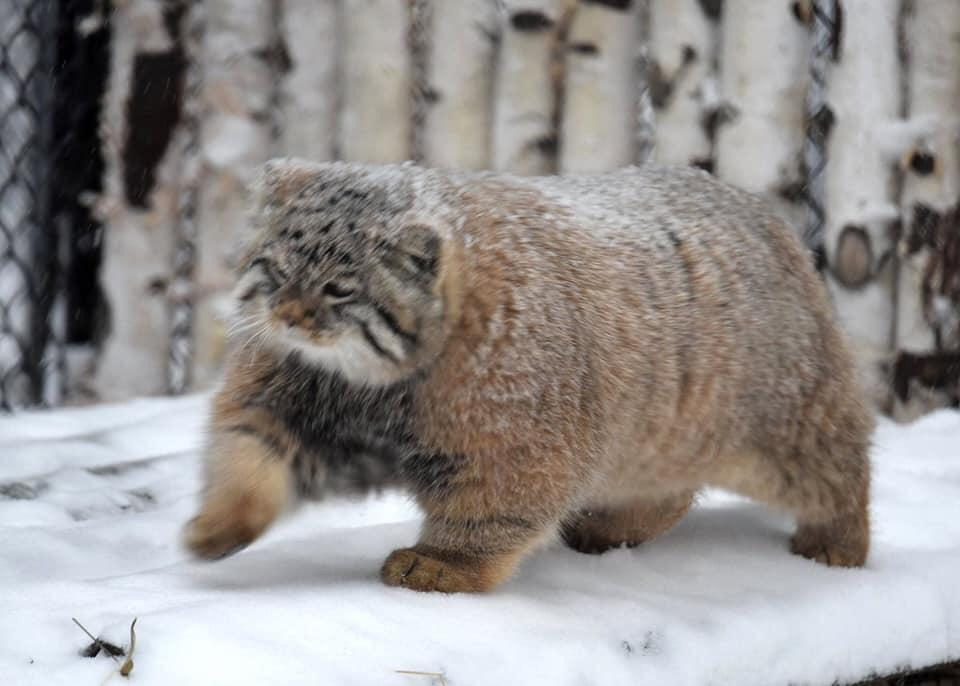

In [34]:
!curl -o colab.png https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/pipeline-cat-chonk.jpeg
import cv2
img = cv2.imread('colab.png', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

In [31]:
from transformers import pipeline

In [32]:
vqa = pipeline(task="vqa")
preds = vqa(image=image, question=question)
preds = vqa(image=image, question=question)
preds = [{"score": round(pred["score"], 4), "answer": pred["answer"]} for pred in preds]
preds

No model was supplied, defaulted to dandelin/vilt-b32-finetuned-vqa and revision 4355f59 (https://huggingface.co/dandelin/vilt-b32-finetuned-vqa).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/136k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/470M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/320 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/251 [00:00<?, ?B/s]

[{'score': 0.9112, 'answer': 'snow'},
 {'score': 0.8796, 'answer': 'in snow'},
 {'score': 0.6717, 'answer': 'outside'},
 {'score': 0.0291, 'answer': 'on ground'},
 {'score': 0.027, 'answer': 'ground'}]